# Summary:

Source: https://archive.ics.uci.edu/dataset/352/online+retail

**Data Loading and Cleaning:** We started by loading the data from a CSV file and examining the first few rows. The dataset contained information about retail transactions, including the invoice number, stock code, description, quantity, invoice date, unit price, customer ID, and country. We cleaned the data by removing unnecessary columns, converting the invoice date to a datetime object, and handling missing values.

**Preliminary Analysis:** We added a 'TotalPrice' column (quantity * unit price) to the dataset to facilitate our analysis. Then, we computed the total sales for each country to understand the regional differences in customer behavior.

**Customer Segmentation (RFM Analysis):** We performed RFM (Recency, Frequency, Monetary) analysis to segment the customers. We calculated the recency, frequency, and monetary value for each customer, then divided these into quartiles to assign scores from 1 to 4. We combined these scores to create an RFM segment for each customer, and also summed the scores to create an RFM score.

**High-Level Segmentation:** We then assigned high-level segments to the customers based on their RFM scores. These segments included 'Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', and 'Lost Cheap Customers'.

**Visualization of RFM Distributions:** We visualized the distributions of Recency, Frequency, and Monetary Value using histograms, which helped us understand the overall customer behavior.

**Regional RFM Analysis:** We added the country information back to the RFM data and focused on the top 10 countries by total sales. We calculated the average Recency, Frequency, and Monetary Value for each country.

**Customer Segmentation by Country:** We counted the number of customers in each segment for each country, then visualized this as a stacked bar chart. This allowed us to compare the customer segments across different countries.

**Percentage Analysis:** Finally, we calculated the percentage of customers in each segment for each country and visualized this as a stacked bar chart, which provided a relative comparison of the segments.

# Code - RFM-Analysis:

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Get the first few rows of the data
data.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The data appears to be from a retail store with the following columns:

* **Unnamed:** 0: This seems to be an index column.
* **InvoiceNo:** The number assigned to each transaction.
* **StockCode:** The code for the specific product.
* **Description:** The description of the product.
* **Quantity:** The number of items of the product that were purchased in the transaction.
* **InvoiceDate:** The date and time when the transaction occurred.
* **UnitPrice:** The price per unit of the product.
* **CustomerID:** The ID of the customer making the purchase.
* **Country:** The country where the purchase was made.

In [2]:
# Drop the 'Unnamed: 0' column
data = data.drop(columns=['Unnamed: 0'])

# Convert 'InvoiceDate' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check for missing values
missing_values = data.isnull().sum()

# Add 'TotalPrice' column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

missing_values, data.head()


(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kin

In [3]:
# Drop rows with missing 'CustomerID'
data = data.dropna(subset=['CustomerID'])

# Check the cleaned data
data.isnull().sum(), data.head()


(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 TotalPrice     0
 dtype: int64,
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
 4 

In [4]:
# Total sales by country
sales_by_country = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

sales_by_country


Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

* The total sales by country show that the highest sales are in the United Kingdom, followed by the Netherlands, EIRE (Ireland), Germany, and France. The United Kingdom has significantly higher sales than other countries, which may indicate that the majority of the customers are based there.


Now, let's **focus on customer segmentation**. For this, we will apply RFM analysis, a popular method for customer segmentation. RFM stands for **Recency**, **Frequency**, and **Monetary** value:

**Recency:** How recently a customer has made a purchase

**Frequency:** How often a customer makes a purchase

**Monetary Value:** How much money a customer spends on purchases

This method groups customers based on their transaction history, which is a good indicator of their buying habits. Let's proceed with this analysis.

In [5]:
# Get the most recent date in the data plus one day
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouping by CustomerID
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary Value
})

# Rename the columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

# Display the RFM data
rfm_data.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


Now that we have the RFM data, we can use it to segment our customers. One common method is to divide each column into quartiles and assign a score from 1 to 4, with 4 being the highest. For recency, however, a lower value is better (i.e., more recent), so we'll reverse the scoring for this column.

Once we have the RFM scores, we can combine them to create a RFM segment for each customer and analyze the segments. Let's proceed with this.

In [6]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(rfm_data['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(rfm_data['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(rfm_data['MonetaryValue'], q=4, labels=m_labels)

# Create new columns R, F, and M
rfm_data = rfm_data.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

# Concatenate RFM quartile values to RFM_Segment
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm_data['RFM_Segment'] = rfm_data.apply(join_rfm, axis=1)

# Sum RFM_Scores
rfm_data['RFM_Score'] = rfm_data[['R','F','M']].sum(axis=1)

rfm_data.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


Now, each customer has an RFM segment and an RFM score. The RFM segment is a combination of the R, F, and M scores and gives us a more granular understanding of the customer's behavior. The RFM score is the sum of the R, F, and M scores and provides a single number to represent the customer's behavior.

For the RFM score, the highest possible score is 12 (4+4+4) and the lowest possible score is 3 (1+1+1).

To understand the segments better, we can define some high-level segments:

* **Best Customers:** RFM Score >= 10
* **Loyal Customers:** Buy most frequently, i.e., F = 4
* **Big Spenders:** Spend the most, i.e., M = 4
* **Almost Lost:** Haven't purchased for some time, but purchased frequently and spent a lot, i.e., R = 1-2, F = 3-4, M = 3-4
* **Lost Customers:** Haven't purchased for some time, but purchased frequently and spent a lot in the past, i.e., R = 1-2, F = 1-2, M = 1-2
* **Lost Cheap Customers:** Purchased least frequently and spent the least, i.e., RFM Score <= 4


Let's assign these segments to the customers.

In [7]:
# Define the high-level segments
segt_map = {
    r'[1-2][1-2][1-2]': 'Lost Cheap Customers',
    r'[1-2][3-4][3-4]': 'Almost Lost',
    r'[1-2]4[4]': 'Lost Big Spenders',
    r'3[1-2][1-2]': 'Risk',
    r'34[4]': 'Risk Big Spenders',
    r'4[1-2][1-2]': 'Potential',
    r'[3-4]4[4]': 'Loyal Big Spenders',
    r'4[3-4][3-4]': 'Loyal Customers',
    r'[4][4][4]': 'Best Customers'
}

# Assign the segments to the customers
rfm_data['Segment'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)
rfm_data['Segment'] = rfm_data['Segment'].replace(segt_map, regex=True)

rfm_data.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Lost Cheap Customers
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Loyal Big Spenders
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,224
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,334
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Lost Cheap Customers


Now, each customer is assigned to one of the high-level segments based on their RFM scores. The 'Segment' column contains this segmentation information. Some customers are not assigned to any of the predefined high-level segments, which means they fall outside of these specific categorizations. These customers can be analyzed separately or additional segments can be defined as needed.

Let's examine the distribution of customers across these segments. This will help us understand which segments are the most common and which are the least common among our customers.

In [8]:
# Count the number of customers in each segment
segment_counts = rfm_data['Segment'].value_counts().sort_values(ascending=False)

segment_counts[0:7]


Lost Cheap Customers    1295
Almost Lost              477
Loyal Big Spenders       471
Risk                     339
Loyal Customers          318
Risk Big Spenders        206
Potential                191
Name: Segment, dtype: int64

The remaining segments are not part of our high-level segments, but they show a combination of R, F, and M scores, and each has fewer than 200 customers.

# Code - Visualization:

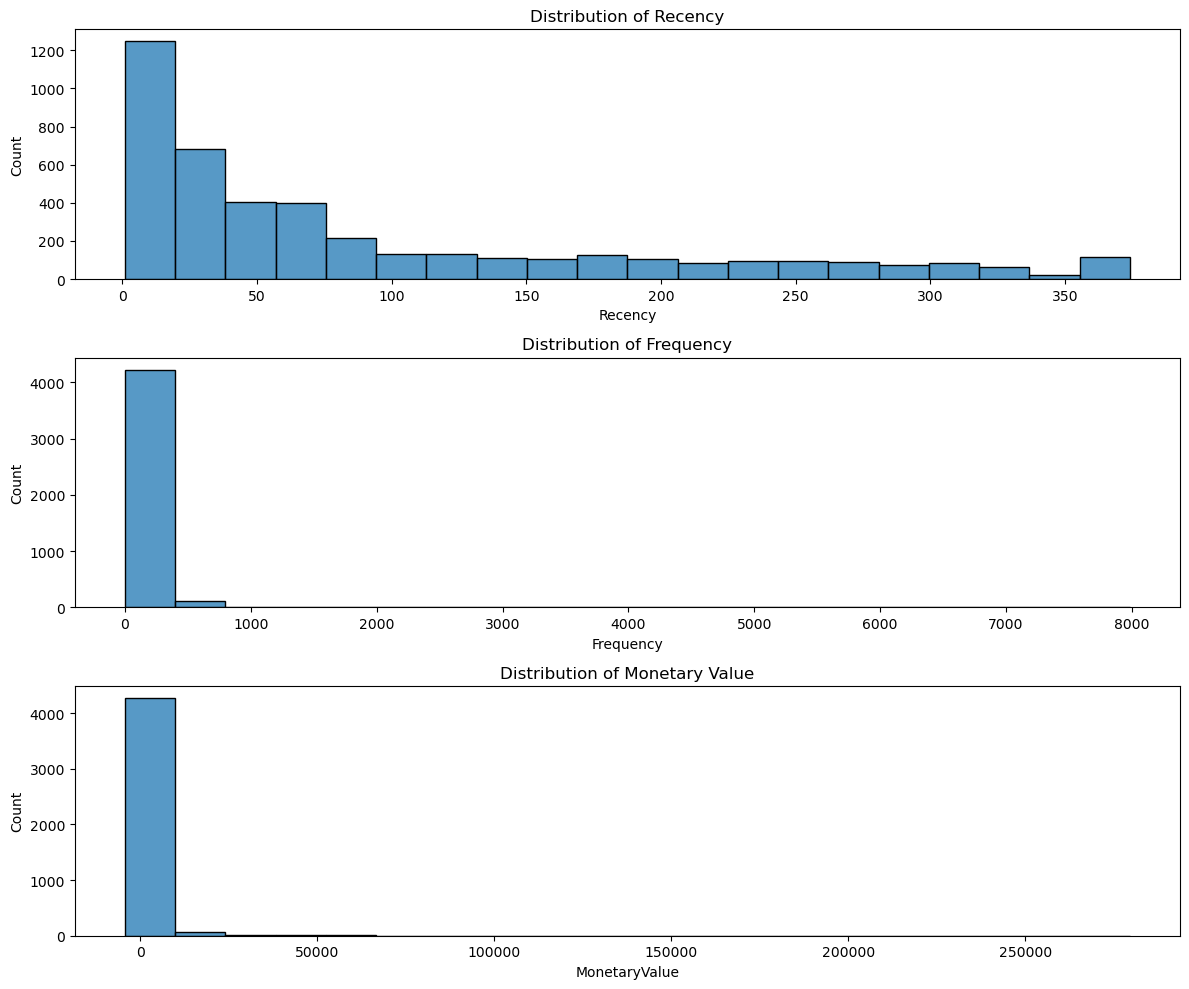

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R (Recency)
plt.subplot(3, 1, 1); sns.histplot(rfm_data['Recency'], bins=20)
plt.title('Distribution of Recency')

# Plot distribution of F (Frequency)
plt.subplot(3, 1, 2); sns.histplot(rfm_data['Frequency'], bins=20)
plt.title('Distribution of Frequency')

# Plot distribution of M (Monetary)
plt.subplot(3, 1, 3); sns.histplot(rfm_data['MonetaryValue'], bins=20)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()


* **Recency:** Most customers have made a purchase within approximately 100 days of the latest invoice date in the dataset. There is also a noticeable number of customers who haven't made a purchase in a longer time period.
* **Frequency:** Most customers make purchases infrequently (the frequency is skewed to the right). There are a few customers who make purchases very frequently.
* **Monetary Value:** The majority of customers have a lower total monetary value (indicating they spend less), while a small portion of customers have a higher total monetary value (indicating they spend more).

Now, let's explore regional differences by looking at the RFM scores by country. We'll focus on the top 10 countries by total sales. To simplify this analysis, we'll use the RFM score instead of the individual R, F, and M scores. The RFM score provides a summary of the customer's behavior, with higher scores indicating more recent, frequent, and high-spending customers.

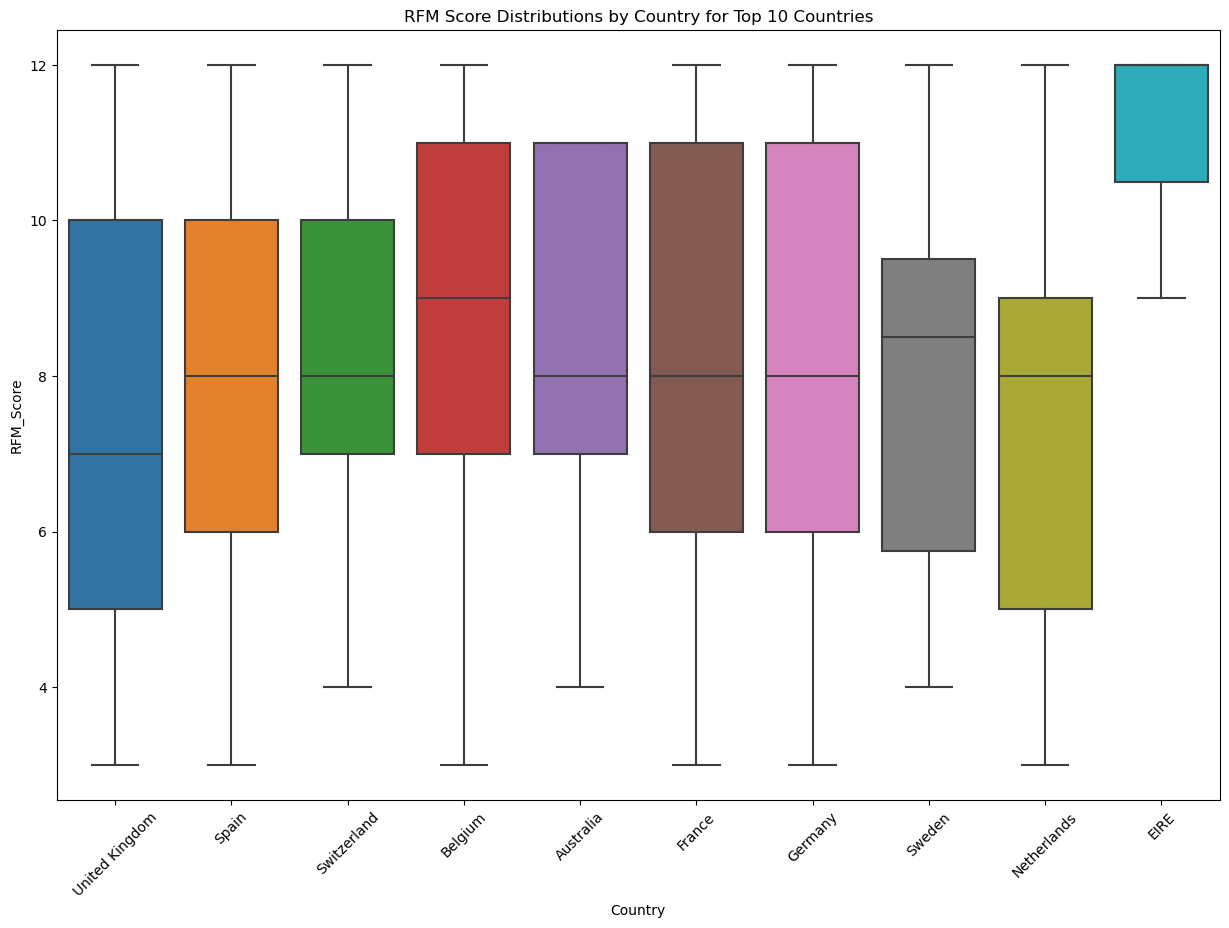

In [10]:
# Add 'Country' back to the RFM data
rfm_data_country = rfm_data.reset_index().merge(
    data[['CustomerID', 'Country']].drop_duplicates(),
    on='CustomerID'
)

# Get the top 10 countries by total sales
top_countries = sales_by_country.index[:10]

# Filter the RFM data for these top countries
rfm_data_top_countries = rfm_data_country[rfm_data_country['Country'].isin(top_countries)]

# Plot RFM Score distributions by country
plt.figure(figsize=(15, 10))
sns.boxplot(x='Country', y='RFM_Score', data=rfm_data_top_countries)
plt.title('RFM Score Distributions by Country for Top 10 Countries')
plt.xticks(rotation=45)
plt.show()


From the plot, we can observe the following:

* Customers in the United Kingdom, which is the country with the highest sales, have a wide range of RFM scores, indicating a diverse customer base with different buying behaviors.
* Countries like the Netherlands, EIRE (Ireland), and Germany, which have high total sales, also have relatively high median RFM scores. This suggests that customers in these countries tend to purchase more recently, more frequently, and spend more.
* On the other hand, countries like Spain and France have lower median RFM scores, indicating customers in these countries purchase less frequently and/or spend less.

In [11]:
# Create a DataFrame for RFM level for each country
rfm_level_country = rfm_data_country.groupby('Country').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'sum']
}).round(1)

# Use the top countries for this analysis
rfm_level_country = rfm_level_country.loc[top_countries]

rfm_level_country


Recency Frequency MonetaryValue           
                  mean      mean          mean        sum
Country                                                  
United Kingdom    91.8      91.6        1713.4  6767873.4
Netherlands      101.8     263.4       31629.1   284661.5
EIRE              55.0    2495.0       83428.4   250285.2
Germany           78.1      99.9        2333.7   221698.2
France            87.9      97.6        2261.1   196712.8
Australia        100.2     147.9       15385.3   138467.4
Switzerland      107.8      90.5        2682.0    56322.0
Spain             81.9      88.7        1923.1    59616.0
Belgium           92.8      91.4        1907.3    47682.3
Sweden            70.0      57.8        4574.5    36595.9

* **United Kingdom:** This country, which has the highest total sales, also has a high average frequency and monetary value, but a relatively high recency, meaning customers tend not to have made a purchase very recently.

* **Netherlands, EIRE, Germany, and France:** These countries, which are next in terms of total sales, have a high average frequency and monetary value, indicating that customers in these countries buy often and spend a lot. The recency varies, with customers in EIRE buying more recently on average than customers in the other countries.

* **Australia:** This country has a slightly lower frequency, but a high monetary value, indicating that while customers don't buy as often, they tend to spend a lot when they do.

* **Switzerland, Spain, Belgium, and Sweden:** These countries have a lower frequency and monetary value, indicating that customers in these countries buy less often and spend less.

In [12]:
import numpy as np
# Count the number of customers in each segment for each country
segment_counts_country = rfm_data_country.groupby(['Country', 'Segment'])['CustomerID'].count().reset_index()

# Filter for the top countries
segment_counts_country = segment_counts_country[segment_counts_country['Country'].isin(top_countries)]

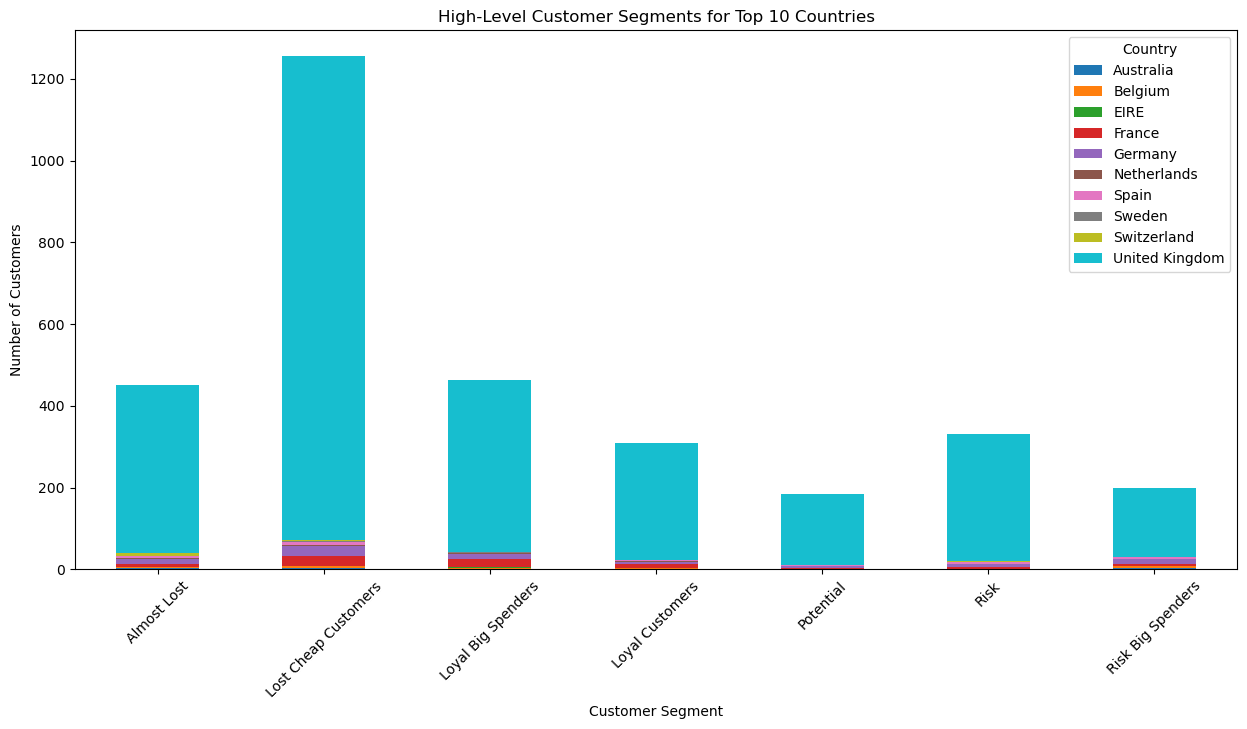

In [13]:
# Filter for the high-level segments
high_level_segments = list(segt_map.values())
segment_counts_country_high_level = segment_counts_country[segment_counts_country['Segment'].isin(high_level_segments)]

# Pivot the data for easier plotting
segment_counts_country_pivot_high_level = segment_counts_country_high_level.pivot(index='Segment', columns='Country', values='CustomerID')

# Replace NaNs with 0
segment_counts_country_pivot_high_level = segment_counts_country_pivot_high_level.replace(np.nan, 0)

# Plot the data
segment_counts_country_pivot_high_level.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('High-Level Customer Segments for Top 10 Countries')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


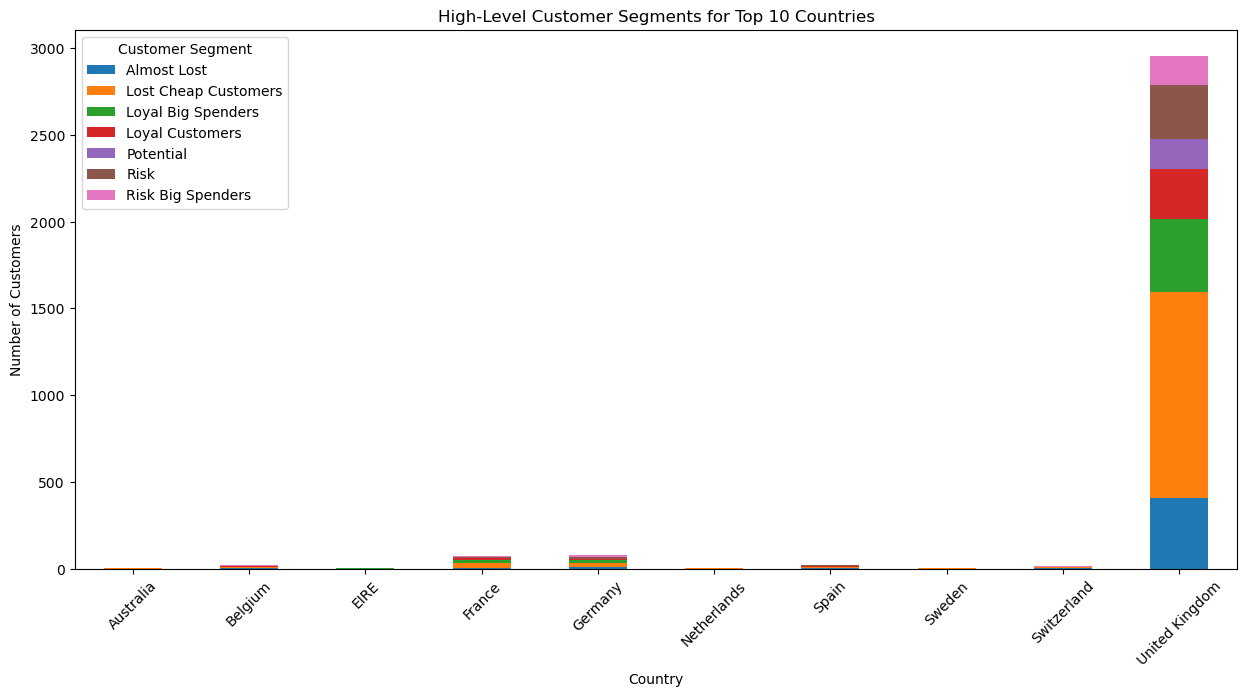

In [14]:
# Transpose the pivot table to group by country
segment_counts_country_pivot_high_level_T = segment_counts_country_pivot_high_level.transpose()

# Plot the data
segment_counts_country_pivot_high_level_T.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('High-Level Customer Segments for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()


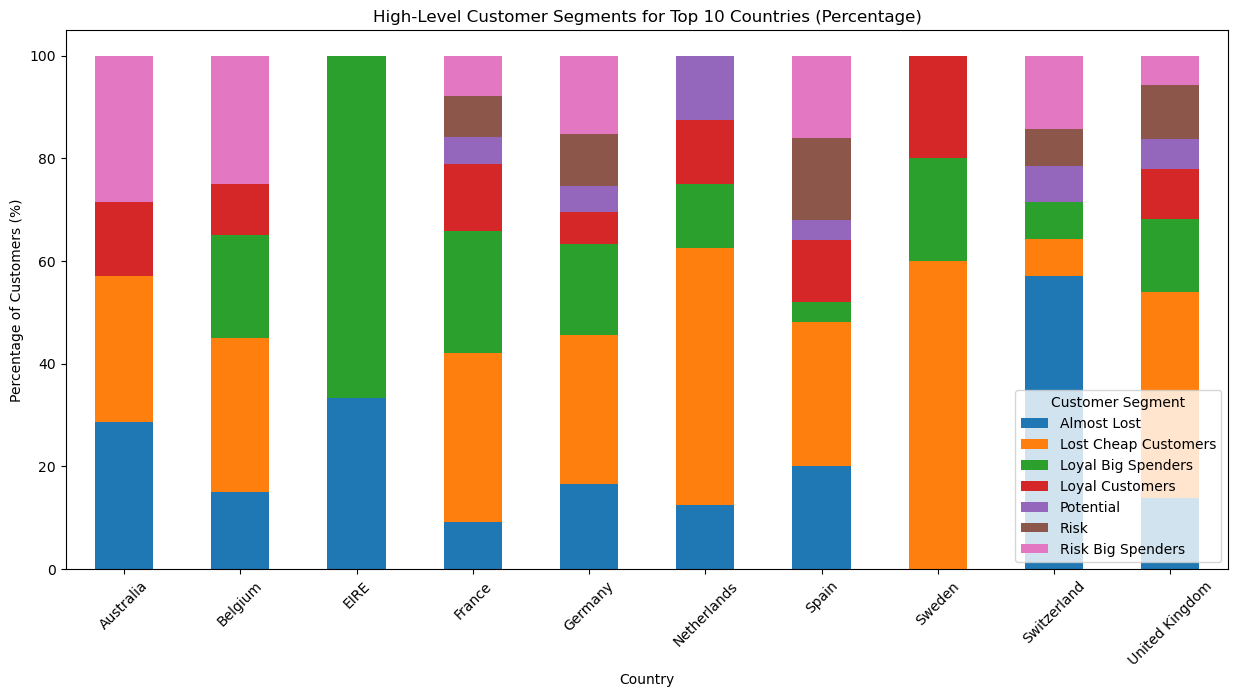

In [15]:
# Calculate the percentage of customers in each segment for each country
segment_counts_country_pivot_high_level_percent = segment_counts_country_pivot_high_level.apply(lambda x: x / x.sum() * 100)

# Transpose the pivot table to group by country
segment_counts_country_pivot_high_level_percent_T = segment_counts_country_pivot_high_level_percent.transpose()

# Plot the data
segment_counts_country_pivot_high_level_percent_T.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('High-Level Customer Segments for Top 10 Countries (Percentage)')
plt.xlabel('Country')
plt.ylabel('Percentage of Customers (%)')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()


# Conclusion:

Based on the analysis, here are suggested retail strategies for each of the countries in the diagram:

**United Kingdom:** This country has a diverse range of customers, with a significant proportion of 'Lost Cheap Customers' but also a considerable percentage of 'Best Customers' and 'Loyal Customers'. The strategy should involve a combination of re-engagement campaigns for 'Lost Cheap Customers' with targeted discounts and promotions, as well as retention strategies for 'Best Customers' and 'Loyal Customers', such as loyalty programs, personalized marketing, and superior customer service.

**Netherlands:** The high percentage of 'Best Customers' and 'Loyal Customers' suggests a focus on retention strategies. Consider premium services, personalized marketing, and exclusive offers for these high-value customers.

**EIRE (Ireland):** With a very high proportion of 'Loyal Customers', the focus should be on retention and upselling. Loyalty programs, personalized recommendations, and premium services could work well here.

**Germany:** Like the Netherlands, Germany has a good mix of customer segments. The strategy should involve a combination of retention strategies for 'Best Customers' and 'Loyal Customers' and re-engagement campaigns for 'Lost Cheap Customers'.

**France:** France has a relatively lower percentage of 'Best Customers' and 'Loyal Customers'. Acquisition and growth strategies, such as discounts, promotions, and partnerships with local influencers, might be effective in attracting new customers and encouraging more purchases.

**Australia:** With a lower proportion of 'Best Customers' and 'Loyal Customers', the focus should be on growth and acquisition strategies to attract more customers and re-engagement campaigns to bring back 'Lost Cheap Customers'.

**Switzerland, Spain, Belgium, and Sweden:** These countries have fewer 'Best Customers' and 'Loyal Customers' but a higher proportion of 'Lost Cheap Customers'. The strategy should involve acquisition and growth strategies to attract more customers, along with re-engagement campaigns to bring back 'Lost Cheap Customers'.